In [1]:
from pyspark.sql import SparkSession
import sys
from pyspark.sql import functions as F


# Create a SparkSession with the required packages
spark = SparkSession.builder \
    .appName("Data_serving_LSTM") \
    .config("spark.executor.extraPythonPackages", "spark_tensorflow_distributor,tensorflow") \
    .config("spark.driver.extraPythonPackages", "spark_tensorflow_distributor,tensorflow") \
    .config("spark.executorEnv.PYTHONPATH", ":".join(sys.path)) \
    .getOrCreate()

spark.sparkContext.setLogLevel("INFO")


df = spark.read.parquet("hdfs:///project/cleaned_data_parquet")

df.show()

11:01:54.591 [Thread-4] INFO  org.apache.spark.sql.internal.SharedState - Setting hive.metastore.warehouse.dir ('null') to the value of spark.sql.warehouse.dir.
11:01:54.598 [Thread-4] INFO  org.apache.spark.sql.internal.SharedState - Warehouse path is 'file:/home/ubuntu/project/spark-warehouse'.
11:01:54.611 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /SQL: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
11:01:54.613 [Thread-4] INFO  org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@6f251306{/SQL,null,AVAILABLE,@Spark}
11:01:54.613 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /SQL/json: org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter
11:01:54.614 [Thread-4] INFO  org.sparkproject.jetty.server.handler.ContextHandler - Started o.s.j.s.ServletContextHandler@5c6cb2a7{/SQL/json,null,AVAILABLE,@Spark}
11:01:54.614 [Thread-4] INFO  org.apache.spark.ui.ServerInfo - Adding filter to /S

11:01:57.893 [task-result-getter-0] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 0.0 (TID 0) in 1968 ms on datanode2 (executor 2) (1/1)
11:01:57.896 [task-result-getter-0] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 0.0, whose tasks have all completed, from pool 
11:01:57.900 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 0 (parquet at NativeMethodAccessorImpl.java:0) finished in 2.083 s
11:01:57.903 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 0 is finished. Cancelling potential speculative or zombie tasks for this job
11:01:57.904 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 0: Stage finished
11:01:57.906 [Thread-4] INFO  org.apache.spark.scheduler.DAGScheduler - Job 0 finished: parquet at NativeMethodAccessorImpl.java:0, took 2.132127 s


11:01:58.253 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_0_piece0 on namenode:39495 in memory (size: 47.2 KiB, free: 912.3 MiB)
11:01:58.256 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Removed broadcast_0_piece0 on datanode2:39481 in memory (size: 47.2 KiB, free: 3.6 GiB)
11:01:59.130 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
11:01:59.131 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
11:01:59.528 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 206.023441 ms
11:01:59.563 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_1 stored as values in memory (estimated size 414.8 KiB, free 911.9 MiB)
11:01:59.573 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_1_piece0 stored as bytes

11:02:00.618 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_1_piece0 in memory on datanode3:43835 (size: 45.1 KiB, free: 3.6 GiB)
11:02:01.990 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 1.0 (TID 1) in 2324 ms on datanode3 (executor 1) (1/1)
11:02:01.991 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 1.0, whose tasks have all completed, from pool 
11:02:01.992 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 1 (showString at NativeMethodAccessorImpl.java:0) finished in 2.351 s
11:02:01.992 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 1 is finished. Cancelling potential speculative or zombie tasks for this job
11:02:01.993 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 1: Stage finished
11:02

11:02:02.831 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 15.527554 ms
+----------+-----------+--------+--------+
|      date|temperature|feature1|feature2|
+----------+-----------+--------+--------+
|2000-01-01|         -6|    0.02|     1.0|
|2000-01-02|         -1|    0.03|     1.0|
|2000-01-03|          2|    0.05|     1.0|
|2000-01-04|          2|    0.07|     1.0|
|2000-01-05|         -1|    0.09|     1.0|
|2000-01-06|          5|     0.1|    0.99|
|2000-01-07|          4|    0.12|    0.99|
|2000-01-08|          6|    0.14|    0.99|
|2000-01-09|          1|    0.15|    0.99|
|2000-01-10|          0|    0.17|    0.99|
|2000-01-11|          3|    0.19|    0.98|
|2000-01-12|          2|    0.21|    0.98|
|2000-01-13|          1|    0.22|    0.98|
|2000-01-14|         -2|    0.24|    0.97|
|2000-01-15|         -3|    0.26|    0.97|
|2000-01-16|          0|    0.27|    0.96|
|2000-01-17|          8|    0.29|    0.96|
|2000-01-18| 

In [2]:
from pyspark.sql import functions as F

total_count = df.count()

train_size = int(total_count * 0.6)
val_size = int(total_count * 0.2)
test_size = int(total_count * 0.2)

train_df = df.limit(train_size).orderBy(F.col('date').asc())
val_df = df.limit(train_size + val_size).subtract(train_df).orderBy(F.col('date').asc())
test_df = df.subtract(train_df).subtract(val_df).orderBy(F.col('date').asc())

# Show sizes of the splits
print(f"Train size: {train_df.count()}")
print(f"Validation size: {val_df.count()}")
print(f"Test size: {test_df.count()}")  


train_df.show()
#Print one row of the dataframe
print(train_df.first())


11:02:02.944 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
11:02:02.944 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
11:02:03.080 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 27.290468 ms
11:02:03.086 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_3 stored as values in memory (estimated size 413.8 KiB, free 911.4 MiB)
11:02:03.099 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_3_piece0 stored as bytes in memory (estimated size 45.0 KiB, free 911.4 MiB)
11:02:03.099 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_3_piece0 in memory on namenode:39495 (size: 45.0 KiB, free: 912.2 MiB)
11:02:03.100 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 3 from count at NativeMethodAccessorImpl.java:0
11:02

11:02:07.746 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_28_piece0 in memory on datanode2:39481 (size: 45.1 KiB, free: 3.6 GiB)
11:02:08.334 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 26.0 (TID 17) in 1392 ms on datanode2 (executor 2) (1/1)
11:02:08.335 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 26.0, whose tasks have all completed, from pool 
11:02:08.336 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 26 (showString at NativeMethodAccessorImpl.java:0) finished in 1.402 s
11:02:08.336 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
11:02:08.336 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - running: Set()
11:02:08.336 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - wa

11:02:08.889 [task-result-getter-3] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 29.0 (TID 19) in 102 ms on datanode2 (executor 2) (1/1)
11:02:08.889 [task-result-getter-3] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 29.0, whose tasks have all completed, from pool 
11:02:08.890 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 29 (first at /tmp/ipykernel_158750/1850621613.py:21) finished in 0.111 s
11:02:08.890 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
11:02:08.890 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - running: Set()
11:02:08.890 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - waiting: Set()
11:02:08.890 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - failed: Set()
11:02:08.913 [Thread-4] INFO  org.apache.spark.SparkContext - Star

In [3]:
from pyspark.sql import DataFrame
from datetime import datetime
import numpy as np

def create_sequences(df, input_length=90, output_length=30):
    sequences = []
    targets = []
    date_input = []
    date_output = []
    
    data = df.collect()

    for i in range(len(data) - input_length - output_length + 1):
        sequence = [[data[j][1], round(data[j][2], 2), round(data[j][3], 2)] for j in range(i, i + input_length)]
        sequences.append(sequence)
        date = [[datetime.strptime(data[j][0], '%Y-%m-%d')] for j in range(i, i + input_length)]
        date_input.append(date)
        
        target = [data[i + input_length + j][1] for j in range(output_length)] 
        targets.append(target)
        date = [datetime.strptime(data[i + input_length + j][0], '%Y-%m-%d') for j in range(output_length)]
        date_output.append(date)
        
    date_input = np.array(date_input)
    date_output = np.array(date_output)
    
    return sequences, targets, date_input, date_output

x_train, y_train, train_date_input, train_date_output = create_sequences(train_df)

x_val, y_val, val_date_input, val_date_output = create_sequences(val_df)

x_test, y_test, test_date_input, test_date_output = create_sequences(test_df)

print(x_train[-1])
print(y_train[-1])

11:02:09.021 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Pushed Filters: 
11:02:09.021 [Thread-4] INFO  org.apache.spark.sql.execution.datasources.FileSourceStrategy - Post-Scan Filters: 
11:02:09.046 [Thread-4] INFO  org.apache.spark.sql.catalyst.expressions.codegen.CodeGenerator - Code generated in 11.666242 ms
11:02:09.051 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_34 stored as values in memory (estimated size 414.8 KiB, free 909.1 MiB)
11:02:09.062 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_34_piece0 stored as bytes in memory (estimated size 45.1 KiB, free 909.1 MiB)
11:02:09.063 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_34_piece0 in memory on namenode:39495 (size: 45.1 KiB, free: 911.7 MiB)
11:02:09.064 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 34 from collect at /tmp/ipykernel_158750/243654852

11:02:09.097 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_35_piece0 in memory on datanode2:39481 (size: 8.1 KiB, free: 3.6 GiB)
11:02:09.131 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_34_piece0 in memory on datanode2:39481 (size: 45.1 KiB, free: 3.6 GiB)
11:02:09.176 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 32.0 (TID 21) in 95 ms on datanode2 (executor 2) (1/1)
11:02:09.176 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 32.0, whose tasks have all completed, from pool 
11:02:09.177 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ShuffleMapStage 32 (collect at /tmp/ipykernel_158750/2436548521.py:11) finished in 0.103 s
11:02:09.177 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - looking for newly runnable stages
11:02:09.1

## LSTM

In [4]:
from spark_tensorflow_distributor import MirroredStrategyRunner
import tensorflow as tf

def train():
    BATCH_SIZE = 64
    EPOCHS = 200

    def make_datasets():
        global x_train, y_train, x_val, y_val
        
        train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(BATCH_SIZE)
        val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(BATCH_SIZE)
        
        options = tf.data.Options()
        options.experimental_distribute.auto_shard_policy = tf.data.experimental.AutoShardPolicy.DATA
        train_dataset = train_dataset.with_options(options)
        val_dataset = val_dataset.with_options(options)
        
        return train_dataset, val_dataset

    def make_test_dataset():
        global x_test, y_test
        test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)
        return test_dataset

    # https://medium.com/@sebastienwebdev/forecasting-weather-patterns-with-lstm-a-python-guide-without-dates-433f0356136c
    def build_and_compile_lstm_model():
        model = tf.keras.Sequential([
            tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(90, 3)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.LSTM(50),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(30)
        ])
        model.compile(
            loss="mean_squared_error",
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        )
        return model

    # Load datasets
    train_datasets, val_datasets = make_datasets()
    test_datasets = make_test_dataset()

    # Build model
    model = build_and_compile_lstm_model()
    
    # Early stopping callback to prevent overfitting
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=50,
        restore_best_weights=True
    )
    
    # Train model
    model.fit(
        x=train_datasets, 
        epochs=EPOCHS, 
        verbose=1,
        validation_data=val_datasets,
        callbacks=[early_stopping_cb]
    )

    # Evaluate and calculate metrics
    y_pred = model.predict(test_datasets)
    
    return {
        "y_pred": y_pred
    }

# Run distributed training
runner = MirroredStrategyRunner(num_slots=3, use_gpu=False)
metrics_results = runner.run(train)
predictions = np.array(metrics_results["y_pred"])
y_test = np.array(y_test)


2024-11-21 11:02:22.996942: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 11:02:23.042179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-21 11:02:23.043266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 11:02:23.777938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Doing CPU training...
Will run with 3 Spark tasks.
Distributed training in progress...
View Spark executor stderr logs to inspect training...


11:02:25.199 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_57 stored as values in memory (estimated size 312.0 B, free 908.8 MiB)
11:02:25.222 [Thread-4] INFO  org.apache.spark.storage.memory.MemoryStore - Block broadcast_57_piece0 stored as bytes in memory (estimated size 1355.9 KiB, free 907.5 MiB)
11:02:25.222 [dispatcher-BlockManagerMaster] INFO  org.apache.spark.storage.BlockManagerInfo - Added broadcast_57_piece0 in memory on namenode:39495 (size: 1355.9 KiB, free: 910.1 MiB)
11:02:25.223 [Thread-4] INFO  org.apache.spark.SparkContext - Created broadcast 57 from collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229
11:02:25.239 [Thread-4] INFO  org.apache.spark.SparkContext - Starting job: collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229
11:02:25.245 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAG

11:02:29.194 [dispatcher-event-loop-2] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
11:02:29.195 [dispatcher-event-loop-2] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 36, current progress: 1/3.
11:02:29.358 [dispatcher-event-loop-0] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
11:02:29.358 [dispatcher-event-loop-0] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 35, current progress: 2/3.
11:02:29.584 [dispatcher-event-loop-3] INFO  org.apache.spark.BarrierCoordinator - Current barrier epoch for Stage 55 (Attempt 0) is 0.
11:02:29.584 [dispatcher-event-loop-3] INFO  org.apache.spark.BarrierCoordinator - Barrier sync epoch 0 from Stage 55 (Attempt 0) received update from Task 37, current progress: 3/3.
11:02:29.586 [dispatcher-event-loop-3] INFO

11:13:44.191 [task-result-getter-3] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 2.0 in stage 55.0 (TID 35) in 678938 ms on datanode3 (executor 1) (1/3)
11:13:44.197 [task-result-getter-0] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 1.0 in stage 55.0 (TID 36) in 678945 ms on datanode2 (executor 2) (2/3)
11:13:44.209 [dag-scheduler-event-loop] INFO  org.apache.spark.api.python.PythonAccumulatorV2 - Connected to AccumulatorServer at host: 127.0.0.1 port: 36947


Training with 3 slots is complete!                                              


11:13:44.807 [task-result-getter-1] INFO  org.apache.spark.scheduler.TaskSetManager - Finished task 0.0 in stage 55.0 (TID 37) in 679554 ms on datanode3 (executor 1) (3/3)
11:13:44.807 [task-result-getter-1] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Removed TaskSet 55.0, whose tasks have all completed, from pool 
11:13:44.809 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - ResultStage 55 (collect at /home/ubuntu/.local/lib/python3.8/site-packages/spark_tensorflow_distributor/mirrored_strategy_runner.py:229) finished in 679.562 s
11:13:44.809 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.DAGScheduler - Job 35 is finished. Cancelling potential speculative or zombie tasks for this job
11:13:44.809 [dag-scheduler-event-loop] INFO  org.apache.spark.scheduler.cluster.YarnScheduler - Killing all running tasks in stage 55: Stage finished
11:13:44.810 [Thread-4] INFO  org.apache.spark.scheduler.DAGScheduler - Job 35 finished: collect at /h

### Function Overview: `calculate_metrics_and_plot`

This function calculates metrics and visualizes prediction performance over a specified number of days. It performs the following steps:

1. **Metrics Calculation**:
   - Computes Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for predictions.
   - Calculates confidence intervals and checks if true values lie within these intervals.
   - Calculates the percentage of predictions within a specified margin of error of 1 degree.

2. **Visualization**:
   - Plots the actual vs. predicted values over time, along with a 95% confidence interval.

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

def calculate_metrics_and_plot(predictions, actual, date, x, margin_of_error=1, model_name="LSTM"):
    x = x - 1
    mae = mean_absolute_error(actual[:, x], predictions[:, x])
    mse = mean_squared_error(actual[:, x], predictions[:, x])
    rmse = np.sqrt(mse)
    
    # Calculate residuals
    residuals = actual[:, x] - predictions[:, x]
    
    # Calculate standard deviation of residuals
    std_residuals = np.std(residuals)
    
    # Calculate prediction intervals
    z_score = 1.96  # For 95% confidence interval
    prediction_intervals = z_score * std_residuals
    
    # Calculate confidence intervals
    lower_bounds = predictions[:, x] - prediction_intervals
    upper_bounds = predictions[:, x] + prediction_intervals

    # Check if true values lie within confidence intervals
    within_confidence_interval = np.logical_and(
        actual[:, x] >= lower_bounds,
        actual[:, x] <= upper_bounds
    )

    # Calculate the percentage of true values within the confidence intervals
    percentage_within_interval = np.mean(within_confidence_interval) * 100

    # Calculate the absolute differences between predictions and true values
    absolute_differences = np.abs(actual[:, x] - predictions[:, x])

    # Check if the absolute differences are within the margin of error
    within_margin_of_error = absolute_differences <= margin_of_error

    # Calculate the percentage of predictions within the margin of error
    percentage_within_margin = np.mean(within_margin_of_error) * 100
    
    
    # Plot true values, predictions, and confidence intervals
    plt.figure(figsize=(12, 6))
    plt.plot(date[:, x], actual[:, x], label="True values")
    plt.plot(date[:, x], predictions[:, x], label="Predictions")
    plt.fill_between(date[:, x], lower_bounds, upper_bounds, color='gray', alpha=0.2, label="95% Confidence Interval")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.title(f"{model_name} {x+1} day prediction: True values vs predictions")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    return mae, mse, rmse, percentage_within_interval, percentage_within_margin


# 1 Day prediction

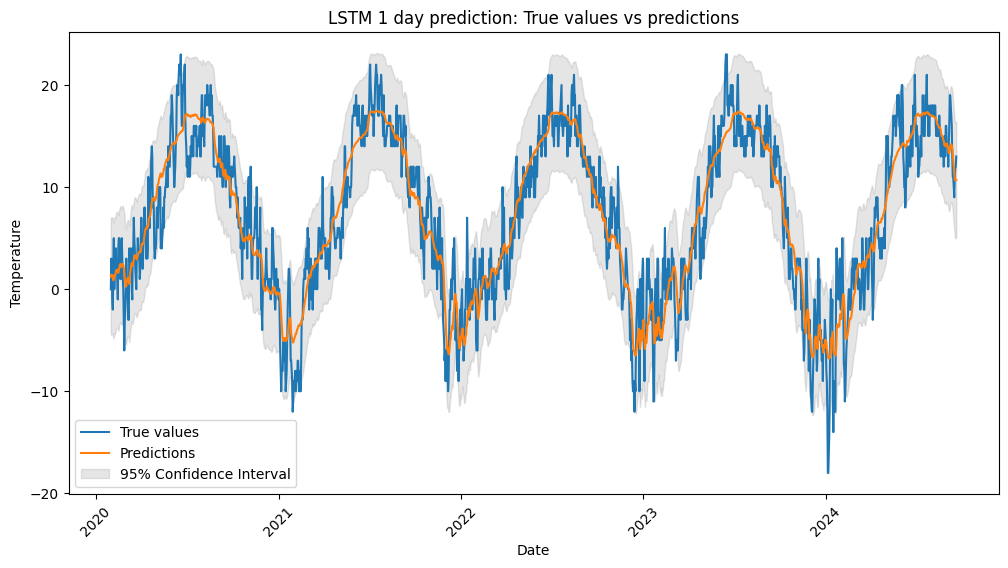

LSTM 1 day MAE: 2.3060727520597037
LSTM 1 day MSE: 8.37672976584914
LSTM 1 day RMSE: 2.894258068287819
LSTM 1 day percentage within confidence interval: 94.91725768321513%
LSTM 1 day percentage within margin of error: 26.24113475177305%


In [6]:
lstm_1day_mae, lstm_1day_mse, lstm_1day_rmse, lstm_one_day_within_interval, lstm_one_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 1)
print(f"LSTM 1 day MAE: {lstm_1day_mae}")
print(f"LSTM 1 day MSE: {lstm_1day_mse}")
print(f"LSTM 1 day RMSE: {lstm_1day_rmse}")
print(f"LSTM 1 day percentage within confidence interval: {lstm_one_day_within_interval}%")
print(f"LSTM 1 day percentage within margin of error: {lstm_one_day_within_margin}%")

# 7 Day prediction

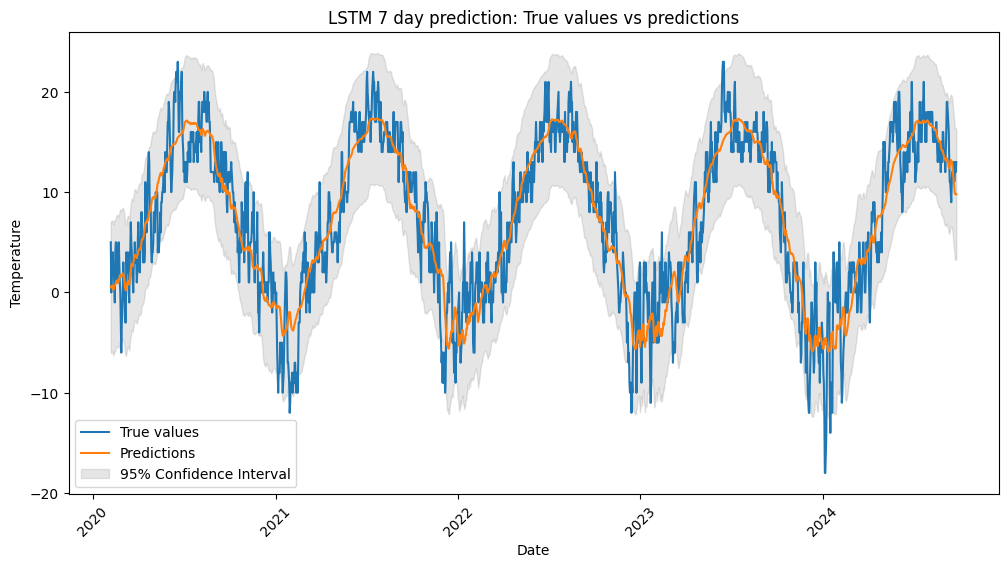

LSTM 7 day MAE: 2.6332684921422187
LSTM 7 day MSE: 11.100370427915486
LSTM 7 day RMSE: 3.331721841318012
LSTM 7 day percentage within confidence interval: 94.73995271867612%
LSTM 7 day percentage within margin of error: 23.995271867612296%


In [7]:
lstm_7day_mae, lstm_7day_mse, lstm_7day_rmse, lstm_seven_day_within_interval, lstm_seven_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 7)
print(f"LSTM 7 day MAE: {lstm_7day_mae}")
print(f"LSTM 7 day MSE: {lstm_7day_mse}")
print(f"LSTM 7 day RMSE: {lstm_7day_rmse}")
print(f"LSTM 7 day percentage within confidence interval: {lstm_seven_day_within_interval}%")
print(f"LSTM 7 day percentage within margin of error: {lstm_seven_day_within_margin}%")

# 30 Day prediction

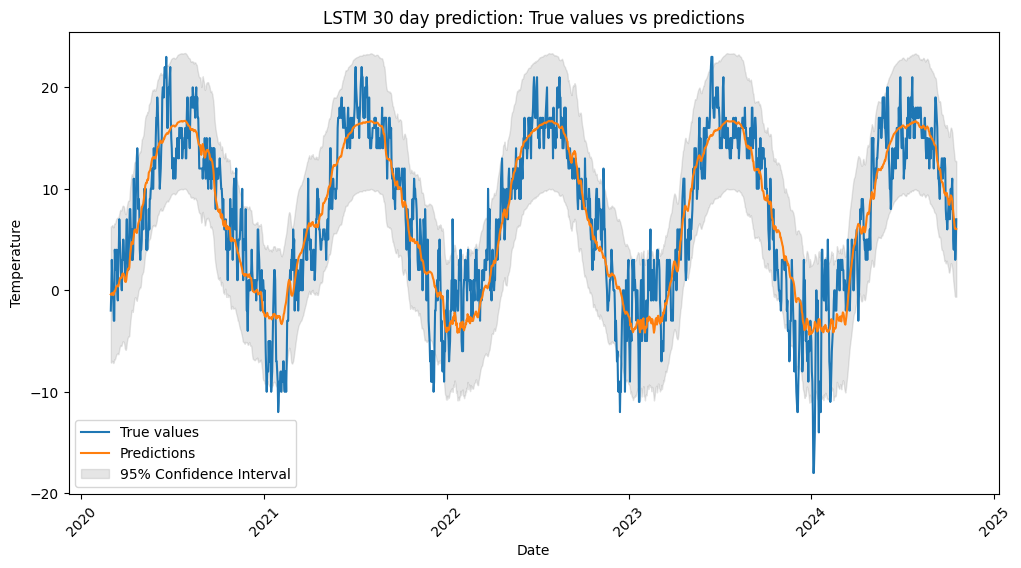

LSTM 30 day MAE: 2.679622081832753
LSTM 30 day MSE: 11.629160391052528
LSTM 30 day RMSE: 3.4101554790144872
LSTM 30 day percentage within confidence interval: 95.09456264775413%
LSTM 30 day percentage within margin of error: 23.10874704491726%


In [8]:
lstm_30day_mae, lstm_30day_mse, lstm_30day_rmse, lstm_thirty_day_within_interval, lstm_thirty_day_within_margin = calculate_metrics_and_plot(predictions, y_test, test_date_output, 30)
print(f"LSTM 30 day MAE: {lstm_30day_mae}")
print(f"LSTM 30 day MSE: {lstm_30day_mse}")
print(f"LSTM 30 day RMSE: {lstm_30day_rmse}")
print(f"LSTM 30 day percentage within confidence interval: {lstm_thirty_day_within_interval}%")
print(f"LSTM 30 day percentage within margin of error: {lstm_thirty_day_within_margin}%")

In [ ]:
spark.stop()